In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
credit_data = pd.read_csv('CleanCreditScoring.csv')

## Data Exploration

In [4]:
credit_data.head(10)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,...,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"
5,good,1,owner,60,36,married,no_rec,fixed,75,214,...,"time (48,99]","age (30,40]","exp (60,80]","inc (190,1e+04]","asset (3e+03,5e+03]","debt (-1,0]","am (600,900]","priz (1.5e+03,1.8e+03]","finr (0,50]","sav (6,99]"
6,good,29,owner,60,44,married,no_rec,fixed,75,125,...,"time (48,99]","age (40,50]","exp (60,80]","inc (110,140]","asset (8e+03,1e+06]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.5e+03,1.8e+03]","finr (80,90]","sav (0,2]"
7,good,9,parents,12,27,single,no_rec,fixed,35,80,...,"time (0,12]","age (25,30]","exp (0,40]","inc (0,80]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (1e+03,1.3e+03]","finr (0,50]","sav (2,4]"
8,good,0,owner,60,32,married,no_rec,freelance,90,107,...,"time (48,99]","age (30,40]","exp (80,1e+04]","inc (80,110]","asset (8e+03,1e+06]","debt (-1,0]","am (1.1e+03,1.4e+03]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
9,bad,0,parents,48,41,married,no_rec,partime,90,80,...,"time (36,48]","age (40,50]","exp (80,1e+04]","inc (0,80]","asset (-1,0]","debt (-1,0]","am (1.1e+03,1.4e+03]","priz (1.3e+03,1.5e+03]","finr (80,90]","sav (-99,0]"


In [7]:
credit_data.iloc[0:10,9:27]

,Income,Assets,Debt,Amount,Price,Finrat,Savings,seniorityR,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,129,0,0,800,846,94.562648,4.200000,"sen (8,14]","time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,131,0,0,1000,1658,60.313631,4.980000,"sen (14,99]","time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,200,3000,0,2000,2985,67.001675,1.980000,"sen (8,14]","time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,182,2500,0,900,1325,67.924528,7.933333,"sen (-1,1]","time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,107,0,0,310,910,34.065934,7.083871,"sen (-1,1]","time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"
5,214,3500,0,650,1645,39.513678,12.830769,"sen (-1,1]","time (48,99]","age (30,40]","exp (60,80]","inc (190,1e+04]","asset (3e+03,5e+03]","debt (-1,0]","am (600,900]","priz (1.5e+03,1.8e+03]","finr (0,50]","sav (6,99]"
6,125,10000,0,1600,1800,88.888889,1.875000,"sen (14,99]","time (48,99]","age (40,50]","exp (60,80]","inc (110,140]","asset (8e+03,1e+06]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.5e+03,1.8e+03]","finr (80,90]","sav (0,2]"
7,80,0,0,200,1093,18.298262,2.700000,"sen (8,14]","time (0,12]","age (25,30]","exp (0,40]","inc (0,80]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (1e+03,1.3e+03]","finr (0,50]","sav (2,4]"
8,107,15000,0,1200,1957,61.318344,0.850000,"sen (-1,1]","time (48,99]","age (30,40]","exp (80,1e+04]","inc (80,110]","asset (8e+03,1e+06]","debt (-1,0]","am (1.1e+03,1.4e+03]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
9,80,0,0,1200,1468,81.743869,-0.400000,"sen (-1,1]","time (36,48]","age (40,50]","exp (80,1e+04]","inc (0,80]","asset (-1,0]","debt (-1,0]","am (1.1e+03,1.4e+03]","priz (1.3e+03,1.5e+03]","finr (80,90]","sav (-99,0]"


In [8]:
credit_data.shape

(4446, 27)

In [9]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      4446 non-null   object 
 1   Seniority   4446 non-null   int64  
 2   Home        4446 non-null   object 
 3   Time        4446 non-null   int64  
 4   Age         4446 non-null   int64  
 5   Marital     4446 non-null   object 
 6   Records     4446 non-null   object 
 7   Job         4446 non-null   object 
 8   Expenses    4446 non-null   int64  
 9   Income      4446 non-null   int64  
 10  Assets      4446 non-null   int64  
 11  Debt        4446 non-null   int64  
 12  Amount      4446 non-null   int64  
 13  Price       4446 non-null   int64  
 14  Finrat      4446 non-null   float64
 15  Savings     4446 non-null   float64
 16  seniorityR  4446 non-null   object 
 17  timeR       4446 non-null   object 
 18  ageR        4446 non-null   object 
 19  expensesR   4446 non-null  

In [10]:
credit_data.describe()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,7.991453,46.453441,37.084121,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432,72.616409,3.860083
std,8.176370,14.647979,10.986366,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171,20.390595,3.726292
min,0.000000,6.000000,18.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000,6.702413,-8.160000
25%,2.000000,36.000000,28.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000,60.030020,1.615385
50%,5.000000,48.000000,36.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000,77.096757,3.120000
75%,12.000000,60.000000,45.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000,88.460263,5.195688
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,100.000000,33.250000


In [13]:
credit_data.duplicated().sum()

2

In [17]:
credit_data.drop_duplicates(inplace=True)

In [18]:
credit_data.duplicated().sum()

0

In [19]:
#Checking for outliers
from scipy import stats
z = np.abs(stats.zscore(credit_data['Age']))
outliers = list(set(np.where(z > 3)[0]))
len(np.where(z > 3)[0])


0

In [20]:
credit_data.isnull().sum()

Status        0
Seniority     0
Home          0
Time          0
Age           0
Marital       0
Records       0
Job           0
Expenses      0
Income        0
Assets        0
Debt          0
Amount        0
Price         0
Finrat        0
Savings       0
seniorityR    0
timeR         0
ageR          0
expensesR     0
incomeR       0
assetsR       0
debtR         0
amountR       0
priceR        0
finratR       0
savingsR      0
dtype: int64

In [22]:
credit_data.drop(['seniorityR','timeR','ageR','expensesR','incomeR','assetsR','debtR','amountR','priceR','finratR','savingsR'],axis = 1, inplace= True)

In [24]:
credit_data.shape

(4444, 16)

In [26]:
credit_data['Status'].value_counts()

good    3196
bad     1248
Name: Status, dtype: int64

In [27]:
credit_data['Home'].value_counts()

owner      2104
rent        973
parents     782
other       319
priv        246
ignore       20
Name: Home, dtype: int64

In [28]:
credit_data['Job'].value_counts()

fixed        2803
freelance    1019
partime       451
others        171
Name: Job, dtype: int64

## Univariant Analysis

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

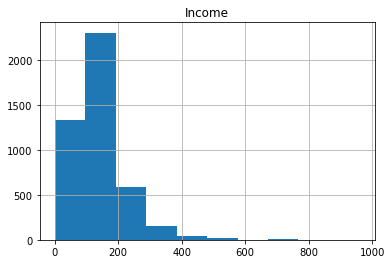

In [29]:
credit_data.hist(column='Income')

There are more individuals earning below 200

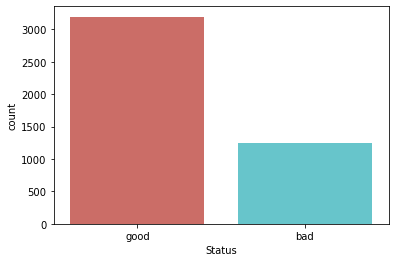

In [31]:
g=sb.countplot(x = 'Status', data= credit_data, palette = 'hls')


There are more individuals with good credit score

<AxesSubplot:xlabel='Debt', ylabel='Density'>

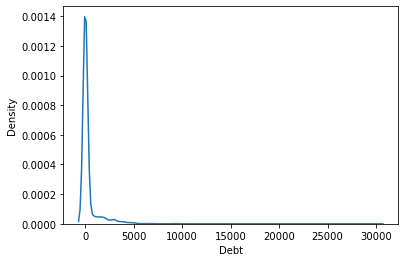

In [33]:
sb.kdeplot(credit_data['Debt'])

There are more persons with zero debts

## Bivariate Analysis

In [35]:
credit_data[['Amount','Income']].corr()

,Amount,Income
Amount,1.000000,0.190663
Income,0.190663,1.000000


<AxesSubplot:>

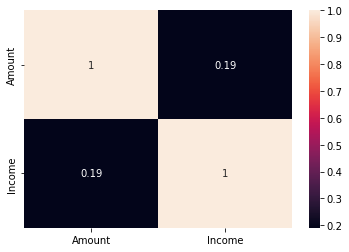

In [37]:
sb.heatmap(credit_data[['Amount','Income']].corr(), annot = True)

The Two variable have a weak positive relationship

In [ ]:
from sklearn.linear_model import LinearRegression

In [44]:
X =credit_data[['Income']].values
Y =credit_data[['Amount']].values

In [45]:
model = LinearRegression().fit(X,Y)

In [47]:
model.coef_

array([[1.12895559]])

In [48]:
model.intercept_

array([880.11663096])

In [ ]:
## the mathematical expression of the linear regression will be 
Amount = 1.128*income + 880.1 

## Multivariate Analysis

In [52]:
#transforming the categorical feature to numerical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

credit_data['Job'] = encoder.fit_transform(credit_data['Job'])


In [56]:
# Extract the features(independent variable)nd labels (dependent variable)

x = credit_data.loc[:, ['Job','Assets','Debt','Income','Expenses']].values


In [57]:
# Step 1: Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[ 0.40506746, -0.46407386, -0.27507024, -0.14530561,  0.89176346],
       [-0.63546421, -0.46407386, -0.27507024, -0.12036111, -0.38938328],
       [ 0.40506746, -0.20397356, -0.27507024,  0.74022393,  1.76294324],
       ...,
       [ 2.48613078, -0.16062351, -0.27507024, -0.63172324,  0.22556716],
       [ 0.40506746, -0.46407386, -0.27507024, -0.00811089, -0.33813741],
       [ 0.40506746, -0.11727346,  0.52826302, -0.00811089,  0.22556716]])

In [58]:
from sklearn.decomposition import PCA
pc = PCA(n_components=5)

In [60]:
p = pc.fit_transform(x_scaled)
p

array([[-0.13193824, -0.54425104, -0.84092751, -0.44399213,  0.23142736],
       [-0.46283751, -0.47271612,  0.60939255,  0.13354354, -0.1845991 ],
       [ 0.90969556, -1.01027715, -1.38379397, -0.39891865,  0.12256042],
       ...,
       [-0.92679566,  1.15911162, -2.06540225, -0.51307089, -0.02542544],
       [-0.55028801,  0.05140323, -0.23394866, -0.04237115, -0.45554807],
       [ 0.18197943,  0.28140053, -0.23188969, -0.58455218, -0.00800052]])

In [61]:
credit_data1 = pd.DataFrame(data=p, columns= ['PC1','PC2','PC3','PC4','PC5'])
credit_data_Df = pd.concat([credit_data1, credit_data[['Status']]], axis = 1)
credit_data_Df.head()

,PC1,PC2,PC3,PC4,PC5,Status
0,-0.131938,-0.544251,-0.840928,-0.443992,0.231427,good
1,-0.462838,-0.472716,0.609393,0.133544,-0.184599,good
2,0.909696,-1.010277,-1.383794,-0.398919,0.122560,bad
3,0.358357,-0.865050,0.146650,0.139534,-0.181059,good
4,-0.694094,-0.369615,0.694293,0.110598,-0.016488,good


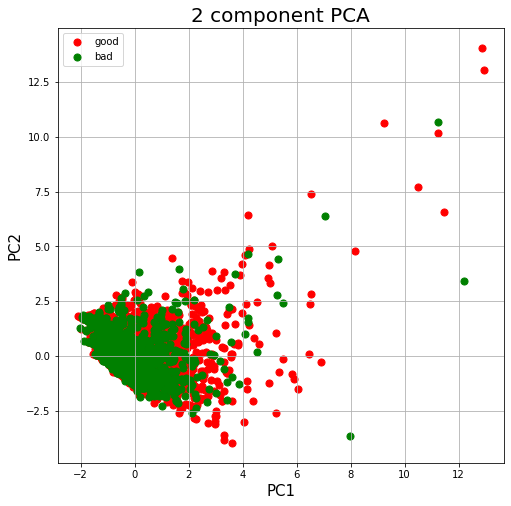

In [64]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['good', 'bad']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = credit_data_Df['Status'] == target
    ax.scatter(credit_data_Df.loc[indicesToKeep, 'PC1']
               , credit_data_Df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()